In [37]:
import numpy as np
import pandas as pd

import pandas_profiling

In [38]:
titanicRawTrain = pd.read_csv('../data/raw/train.csv')

In [39]:
titanicRawTrain.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## EDA

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

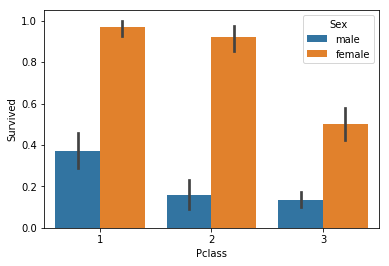

In [41]:
sns.barplot(x = "Pclass", y = "Survived", hue = "Sex", data = titanicRawTrain)

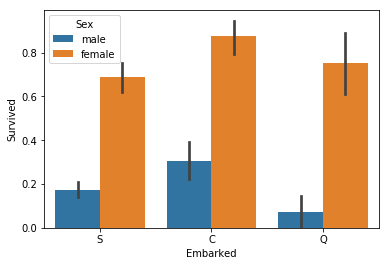

In [42]:
sns.barplot(x = "Embarked", y = "Survived", hue = "Sex", data = titanicRawTrain)

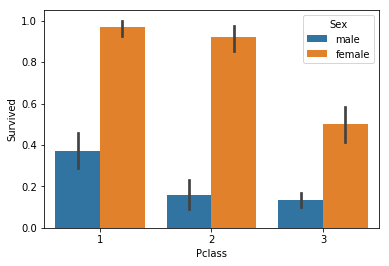

In [43]:
sns.barplot(x = "Pclass", y = "Survived", hue = "Sex", data = titanicRawTrain)

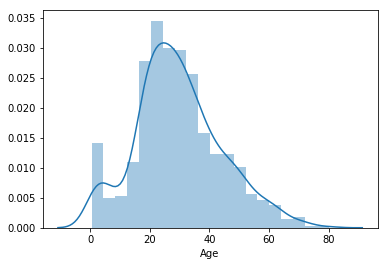

In [44]:
## Find whether to replace NaN with mean or median. Use median if large group of outliers. 
sns.distplot(titanicRawTrain.Age[titanicRawTrain.Age.notnull() == True])

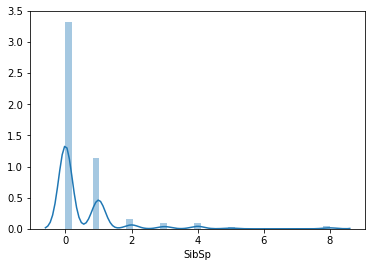

In [45]:
sns.distplot(titanicRawTrain.SibSp)

## Find and replace Nulls

In [46]:
titanicRawTrain.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Feature Engineering

In [47]:
def simplify_sex(df):
    sex = pd.get_dummies(df.Sex, prefix = 'Sex')
    df = pd.concat([df, sex], axis = 1)
    return df

In [48]:
def simplify_class(df):
    new_class = pd.get_dummies(df.Pclass, prefix = 'Class')
    df = pd.concat([df, new_class], axis = 1)
    return df

In [49]:
def simplify_embarked(df):
    df.Embarked.fillna(df.Embarked.mode()[0], inplace = True)
    embarked = pd.get_dummies(df.Embarked , prefix='Embarked' )
    df = pd.concat([df, embarked], axis=1)
    return df

In [50]:
def simplify_ages(df):
    bins = (0,5,12,18,25,35,60,120)
    #fill with mean
    df.Age = df.Age.fillna(df.Age.median())
    #df.Age = df.Age.fillna(-0.5)
    group_names = ['Baby', 'Child', 
                   'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
    df.Age = pd.cut(df.Age, bins, labels = group_names)
    ages = pd.get_dummies(df.Age, prefix = 'Age')
    df = pd.concat([df,ages], axis = 1)
    return df

In [51]:
def simplify_fares(df):
    df.Fare = df.Fare.fillna(-0.5)
    bins = (-1, 0, 8, 15, 31, 1000)
    group_names = ['Unknown', '1_quartile', '2_quartile', '3_quartile', '4_quartile']
    df.Fare = pd.cut(df.Fare, bins, labels=group_names)
    fare = pd.get_dummies(df.Fare, prefix = 'Fare')
    df = pd.concat([df, fare], axis = 1)
    return df

In [52]:
def drop_features(df):
    return df.drop(['Ticket', 'Name', 'Age', 'Embarked', 'Pclass', 'Sex', 'Cabin', 'Fare', 'SibSp'], axis=1)

In [53]:
def simpFamSize(df):
    bins = (0, 2, 4, 8, 20)
    group_names = ['Small', 'Medium', 'Large', 'ExtLarge']
    df.SibSp = pd.cut(df.SibSp, bins, labels = group_names)
    sibsp = pd.get_dummies(df.SibSp, prefix = 'Sibs')
    df = pd.concat([df, sibsp], axis = 1)
    return df

In [54]:
def execute_cleaning(df):
    df = simplify_ages(df)
    df = simplify_embarked(df)
    df = simplify_fares(df)
    df = simplify_class(df)
    df = simplify_sex(df)
    df = simpFamSize(df)
    df = drop_features(df)
    return df

In [55]:
titanicCleanTrain = execute_cleaning(titanicRawTrain)

In [56]:
def produce_columns(df):
    columnsNames = []
    for i in df.columns:
        if i == 'Survived' or i == 'PassengerId':
            pass            
        else:
            columnsNames.append(i)
    return columnsNames

In [57]:
titanicColumns = produce_columns(titanicCleanTrain)

In [58]:
titanicCleanTrain.head()

,PassengerId,Survived,Parch,Age_Baby,Age_Child,Age_Teenager,Age_Student,Age_Young Adult,Age_Adult,Age_Senior,...,Fare_4_quartile,Class_1,Class_2,Class_3,Sex_female,Sex_male,Sibs_Small,Sibs_Medium,Sibs_Large,Sibs_ExtLarge
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,1,0,0,0
1,2,1,0,0,0,0,0,0,1,0,...,1,1,0,0,1,0,1,0,0,0
2,3,1,0,0,0,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
3,4,1,0,0,0,0,0,1,0,0,...,1,1,0,0,1,0,1,0,0,0
4,5,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0


## Test out FE source code 

In [25]:
import sys
sys.path.append('/home/rob/Dropbox/DataProject/titanicKaggle/src/features')

In [26]:
import build_features

In [27]:
titanicCleanTrain = build_features.execute_cleaning(titanicRawTrain)

ValueError: fill value must be in categories

In [119]:
titanicCleanTrain.head()

,PassengerId,Survived,SibSp,Parch,Age_Unknown,Age_Baby,Age_Child,Age_Teenager,Age_Student,Age_Young Adult,...,Fare_Unknown,Fare_1_quartile,Fare_2_quartile,Fare_3_quartile,Fare_4_quartile,Class_1,Class_2,Class_3,Sex_female,Sex_male
0,1,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,1
1,2,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
2,3,1,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,1,0
3,4,1,1,0,0,0,0,0,0,1,...,0,0,0,0,1,1,0,0,1,0
4,5,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,1


## Build decision tree model

In [59]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import cross_val_score

In [60]:
X_train, X_test, y_train, y_test = train_test_split(titanicCleanTrain[titanicColumns], 
                                                    titanicCleanTrain.Survived, test_size = 0.4, random_state =0)

In [61]:
clf = tree.DecisionTreeClassifier()

In [62]:
clf = clf.fit(X_train, y_train)

In [63]:
clf.score(X_test, y_test)

0.78711484593837533

## Investigate Model

In [64]:
from sklearn.cross_validation import KFold
from sklearn.metrics import make_scorer, accuracy_score

/home/rob/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [65]:
def run_kfold(clf, X_all, y_all):
    kf = KFold(891, n_folds = 10)
    outcomes = []
    fold = 0
    for train_i, test_i in kf:
        fold += 1
        X_train, X_test = X_all.values[train_i], X_all.values[test_i]
        y_train, y_test = y_all.values[train_i], y_all.values[test_i]
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        outcomes.append(accuracy)
        print("Fold {0} accuracy: {1}".format(fold, accuracy))
    mean_outcome = np.mean(outcomes)
    print("Mean Accuracy: {0}". format(mean_outcome))

In [109]:
run_kfold(clf, titanicCleanTrain[titanicColumns], titanicCleanTrain['Survived'])

Fold 1 accuracy: 0.7222222222222222
Fold 2 accuracy: 0.7865168539325843
Fold 3 accuracy: 0.7528089887640449
Fold 4 accuracy: 0.7752808988764045
Fold 5 accuracy: 0.8426966292134831
Fold 6 accuracy: 0.8202247191011236
Fold 7 accuracy: 0.7640449438202247
Fold 8 accuracy: 0.7752808988764045
Fold 9 accuracy: 0.8202247191011236
Fold 10 accuracy: 0.8539325842696629
Mean Accuracy: 0.7913233458177278


## Test it out

In [110]:
titanicRawTest = pd.read_csv('../data/raw/test.csv')

In [111]:
data_test = execute_cleaning(titanicRawTest)

In [112]:
ids = data_test['PassengerId']
predictions = clf.predict(data_test.drop('PassengerId', axis=1))

output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('titanic-predictions.csv', index = False)

In [113]:
output.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0


In [83]:
## Current score: 76%